In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Preprocessing

In [6]:
df = pd.read_csv('../data/cleaned/final-cleaned.csv')

In [7]:
df

,category_id,category,articles
0,0,opinion,congress much protect american served country...
1,1,world,attack civilian site syria grown frequent u n ...
2,1,world,week relative calm end wednesday people march ...
3,2,politics,president monitor middle east crisis golf club...
4,3,arts,linda ronstadt sound voice air cnn new season ...
...,...,...,...
2336,4,business,former bos premium cable network talk former v...
2337,2,politics,lobby president washington hotel supporter rem...
2338,5,sports,lakers first game bryant daughter gianna die ...
2339,5,sports,famed run coach already bar sport year dope v...


In [8]:
y = np.array(df.category_id.values)
x = df.articles

In [9]:
cv = CountVectorizer(max_features = 5000)

In [10]:
mtr = cv.fit_transform(x.values.astype('U'))

In [11]:
x = pd.DataFrame(mtr.toarray(),columns=cv.get_feature_names())

In [12]:
x

,21st,49ers,50th,aaron,abandon,abbas,abbott,abc,abdicate,abdul,...,zephyr,zhao,zindani,zion,zionism,zoey,zone,zoning,zuberi,zverev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (2341, 5000)
y.shape =  (2341,)


## Split Train/Test

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1638
703
1638
703


([<matplotlib.patches.Wedge at 0x218e7ab6d60>,
 [Text(-0.6457275908292802, 0.8905256191945372, 'Train'),
  Text(0.6457276742063026, -0.8905255587371533, 'Test')])

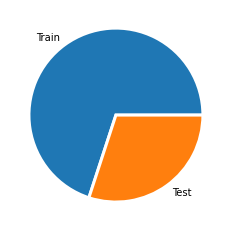

In [15]:
labels = 'Train', 'Test'
plt.pie([len(x_train), len(x_test)], labels=labels, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

## Model Selection

In [16]:
def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2) 
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return [round(accuracy,2), round(precision,2), round(recall,2), round(f1score,2)]

In [18]:
ml_score = [run_model('Logistic Regression', est_c=None, est_pnlty=None), 
            run_model('Random Forest', est_c=None, est_pnlty=None), 
            run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None), 
            run_model('Support Vector Classifer', est_c=None, est_pnlty=None),
            run_model('Decision Tree Classifier', est_c=None, est_pnlty=None),
            run_model('K Nearest Neighbour', est_c=None, est_pnlty=None),
            run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)
           ]

In [19]:
model_score = pd.DataFrame(data=ml_score, index=['Logistic Regression', 'Random Forest', 'Multinomial Naive Bayes', 'Support Vector Classifer', 'Decision Tree Classifier', 'K Nearest Neighbour', 'Gaussian Naive Bayes'], columns=['Accuracy', 'Precision', 'Recall', 'F1'])

In [20]:
model_score

,Accuracy,Precision,Recall,F1
Logistic Regression,69.56,0.70,0.70,0.70
Random Forest,69.70,0.70,0.70,0.70
Multinomial Naive Bayes,68.56,0.69,0.69,0.69
Support Vector Classifer,70.13,0.70,0.70,0.70
Decision Tree Classifier,49.08,0.49,0.49,0.49
K Nearest Neighbour,26.46,0.26,0.26,0.26
Gaussian Naive Bayes,38.69,0.39,0.39,0.39


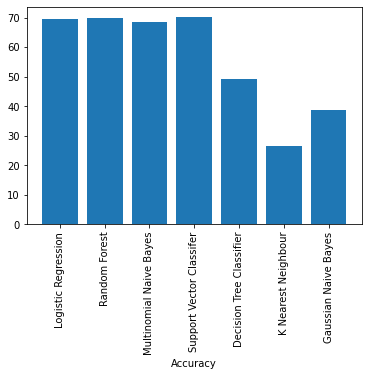

In [21]:
plt.bar(model_score.index, model_score['Accuracy'])
plt.xticks(rotation=90) 
plt.xlabel('Accuracy')
plt.show();

## Fine-Tune

In [22]:
n_estimators = [int(x) for x in np.arange(600)] 
max_features = ['auto', 'sqrt']
max_depth = [None,2,4]
min_samples_split = [2,4]
min_samples_leaf = [1,2,5]
bootsrap = [True, False]

In [23]:
param_grid =  {'n_estimators' : n_estimators,
                'max_features' : max_features,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'bootstrap' : bootsrap}
print(param_grid)

{'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

In [24]:
Rd = RandomForestClassifier() 
rd_Random = RandomizedSearchCV(estimator=Rd, param_distributions=param_grid, cv=10, verbose=2, n_jobs=4)

In [25]:
rd_Random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7,
                                                         8, 9, 10, 11, 12, 13,
                                                         14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, ...]},
                   verbose=2)

In [26]:
rd_Random.best_params_

{'n_estimators': 322,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

## Prediction

In [27]:
classifier = RandomForestClassifier(bootstrap = False, n_estimators=566, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=4).fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [28]:
text = ['Trump republican']

In [29]:
y_cv = cv.transform(text)
yy = classifier.predict(y_cv)
result = ""
if yy == [0]:
    result = "opinion"
elif yy == [1]:
    result = "world"
elif yy == [2]:
    result = "Politics News"
elif yy == [3]:
    result = "arts"
elif yy == [4]:
    result = "business"
elif yy == [5]:
    result = "sports"
print(result)

opinion


## Evaluation

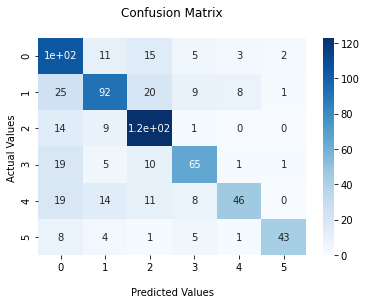

In [30]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [41]:
def print_value(data):
    result = []
    for i in data:
        if i == [0]:
            result.append("opinion")
        elif i == [1]:
            result.append("world")
        elif i == [2]:
            result.append("Politics News")
        elif i == [3]:
            result.append("arts")
        elif i == [4]:
            result.append("business")
        elif i == [5]:
            result.append("sports")
    return result
score_ = pd.DataFrame(data={"Actual" : print_value(y_test), "Predict" : print_value(y_pred)})
score_

,Actual,Predict
0,arts,Politics News
1,opinion,opinion
2,arts,opinion
3,business,business
4,world,world
...,...,...
698,sports,opinion
699,world,arts
700,sports,arts
701,business,opinion


<BarContainer object of 2 artists>

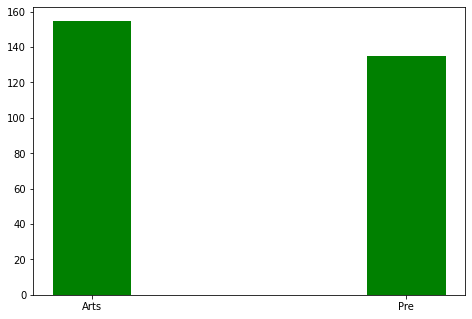

In [60]:
data =[[len(score_.loc[score_['Actual'] == 'arts']), len(score_.loc[score_['Predict'] == 'arts'])],
       [len(score_.loc[score_['Actual'] == 'world']), len(score_.loc[score_['Predict'] == 'world'])],
]
X = ['Arts', 'Pre']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X , data[0], color = 'b', width = 0.25)
ax.bar(X , data[1], color = 'g', width = 0.25)

In [ ]:
len(y_pred[])

In [40]:
def score_graph()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Actual   703 non-null    object
 1   Predict  703 non-null    object
dtypes: object(2)
memory usage: 11.1+ KB


In [56]:
[len(score_.loc[score_['Actual'] == 'arts']), len(score_.loc[score_['Predict'] == 'arts'])]

[101, 93]